# Cab Investment
## The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

## Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

## Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

1. Cab_Data.csv – this file includes details of transaction for 2 cab companies

2. Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

3. Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

4. City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

1. Review the Source Documentation
2. Understand the field names and data types
3. Identify relationships across the files
4. Field/feature transformations
5. Determine which files should be joined versus which ones should be appended
6. Create master data and explain the relationship
7. Identify and remove duplicates
8. Perform other analysis like NA value and outlier detection

In [2]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')


# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/'

Mounted at /content/drive


In [3]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [5]:
# The random seed
random_seed = 42

# Loading the Data

We have 4 datasets to load.

In [6]:
import pandas as pd

# Load the raw cab data
city_data = pd.read_csv(abspath_curr + 'Datasets/City.csv',
                           header=0)
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
import pandas as pd

# Load the raw cab data
cab_data = pd.read_csv(abspath_curr + 'Datasets/Cab_Data.csv',
                           header=0)
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [8]:
import pandas as pd

# Load the raw cab data
customer_data = pd.read_csv(abspath_curr + 'Datasets/Customer_ID.csv',
                           header=0)
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [9]:
import pandas as pd

# Load the raw cab data
transaction_data = pd.read_csv(abspath_curr + 'Datasets/Transaction_ID.csv',
                           header=0)
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


### Quick Overview of the 4 datasets

1. **Cab_Data.csv:**

* Transaction ID: Unique transaction identifier

* Date of Travel: A date represented as a serial number (we'll need to convert this)

* Company: Name of the cab company

* City: The city where the ride took place

* KM Travelled: Distance of the ride

* Price Charged: The price charged to the customer

* Cost of Trip: The actual cost of providing the ride

2. **City.csv:**

* City: Name of the city

* Population: City population

* Users: Number of cab users in the city

3. **Customer_ID.csv:**

* Customer ID: Unique customer identifier

* Gender: Gender of the customer

* Age: Age of the customer

* Income (USD/Month): Monthly income of the customer

4. **Transaction_ID.csv:**

* Transaction ID: Unique transaction identifier

* Customer ID: Unique customer identifier

* Payment_Mode: Mode of payment (e.g., card or cash)

# Formatting the Date

In [10]:
# Convert the 'Date of Travel' to a readable date format
# The dates are in Excel serial number format, so we need to convert them
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], origin='1899-12-30', unit='D')
cab_data['Date of Travel'] = cab_data['Date of Travel'].dt.strftime('%d-%m-%y')
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-16,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-16,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-16,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-16,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-16,Pink Cab,ATLANTA GA,8.73,114.62,97.776


# Combining the Data

#### Merging all 4 datasets into one using joins.

In [11]:
# Merge cab_data with transaction_data on 'Transaction ID'
merged_data = pd.merge(cab_data, transaction_data, on='Transaction ID')

# Merge with customer_data on 'Customer ID'
merged_data = pd.merge(merged_data, customer_data, on='Customer ID')

# Merge with city_data on 'City'
# To ensure matching, we will strip extra spaces from city names and match based on the cleaned city names
merged_data['City'] = merged_data['City'].str.strip()
city_data['City'] = city_data['City'].str.strip()

final_data = pd.merge(merged_data, city_data, on='City')

# Show the first few rows of the final merged dataset
final_data_head = final_data.head()
final_data_head

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,08-01-16,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,21-07-18,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,23-11-18,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,06-01-16,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,21-04-18,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


#### The datasets have been successfully merged into a comprehensive dataset. Here's what the final dataset includes:

* Transaction ID: Unique identifier for each transaction.
* Date of Travel: The actual date of travel.
* Company: Cab company (either "Pink Cab" or "Yellow Cab").
* City: City where the cab ride took place.
* KM Travelled: Distance covered during the ride.
* Price Charged: Amount charged to the customer.
* Cost of Trip: Cost to the cab company.
* Customer ID: Unique identifier for the customer.
* Payment Mode: Mode of payment (Card or Cash).
* Gender, Age, Income: Demographic details of the customer.
* City Population and Users: City-level data with population and number of cab users.

# Summary Statistics

#### Checking for missing values, average distance travelled by the cab, user information etc.

In [12]:
# Summary statistics of key numerical variables
summary_stats = final_data[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)']].describe()

# Check for missing values
missing_values = final_data.isnull().sum()

# Analyzing the distribution of key variables
km_travelled_dist = final_data['KM Travelled'].describe()
price_charged_dist = final_data['Price Charged'].describe()
cost_of_trip_dist = final_data['Cost of Trip'].describe()

# Company-wise statistics (Pink Cab vs Yellow Cab)
company_stats = final_data.groupby('Company').agg({
    'KM Travelled': ['mean', 'median', 'std'],
    'Price Charged': ['mean', 'median', 'std'],
    'Cost of Trip': ['mean', 'median', 'std']

})

# Gender, Age, Income distribution
gender_dist = final_data['Gender'].value_counts()
age_dist = final_data['Age'].describe()
income_dist = final_data['Income (USD/Month)'].describe()

# Display the results
summary_stats, missing_values, company_stats, gender_dist, age_dist, income_dist


(        KM Travelled  Price Charged   Cost of Trip            Age  \
 count  359392.000000  359392.000000  359392.000000  359392.000000   
 mean       22.567254     423.443311     286.190113      35.336705   
 std        12.233526     274.378911     157.993661      12.594234   
 min         1.900000      15.600000      19.000000      18.000000   
 25%        12.000000     206.437500     151.200000      25.000000   
 50%        22.440000     386.360000     282.480000      33.000000   
 75%        32.960000     583.660000     413.683200      42.000000   
 max        48.000000    2048.030000     691.200000      65.000000   
 
        Income (USD/Month)  
 count       359392.000000  
 mean         15048.822937  
 std           7969.409482  
 min           2000.000000  
 25%           8424.000000  
 50%          14685.000000  
 75%          21035.000000  
 max          35000.000000  ,
 Transaction ID        0
 Date of Travel        0
 Company               0
 City                  0
 KM Tr

#### Key Insights
1. **Summary Statistics:**
* KM Travelled: The average distance covered per ride is approximately 22.57 km, with a maximum of 48 km.

* Price Charged: The average price charged to customers is  `$423.44`, with a maximum price of `$2048.03`.

* Cost of Trip: The average cost to the cab companies is `$286.19`, with a maximum of `$691.20`.

* Customer Age: The average customer age is 35, with a range from 18 to 65.

* Income: The average monthly income of customers is around 15,048, with a wide range between `$2,000` and `$35,000`.

2. **Missing Values:**

* There are no missing values in the dataset, which simplifies further analysis.

3. **Company-wise Comparison:**

* KM Travelled: Both Pink Cab and Yellow Cab show very similar average distances per trip (~22.56 km).

* Price Charged: Yellow Cab charges significantly more on average (`$458.18`) compared to Pink Cab (`$310.80`).

* Cost of Trip: Yellow Cab's trips are also more expensive to operate on average (`$297.92`) than Pink Cab's (`$248.15`).

4. **Gender Distribution:**
* There are more male customers (205,912) than female customers (153,480).

5. **Age Distribution:**

* The customer base spans a wide range of ages, with a median age of 33. Most customers fall between 25 and 42 years old.

6. **Income Distribution:**

* The median income is around `$14,685`, with 50% of customers earning between `$8,424` and `$21,035` per month.

# EDA
### Visualizing some of the statistics

#### 1. Revenue over Time for both companies

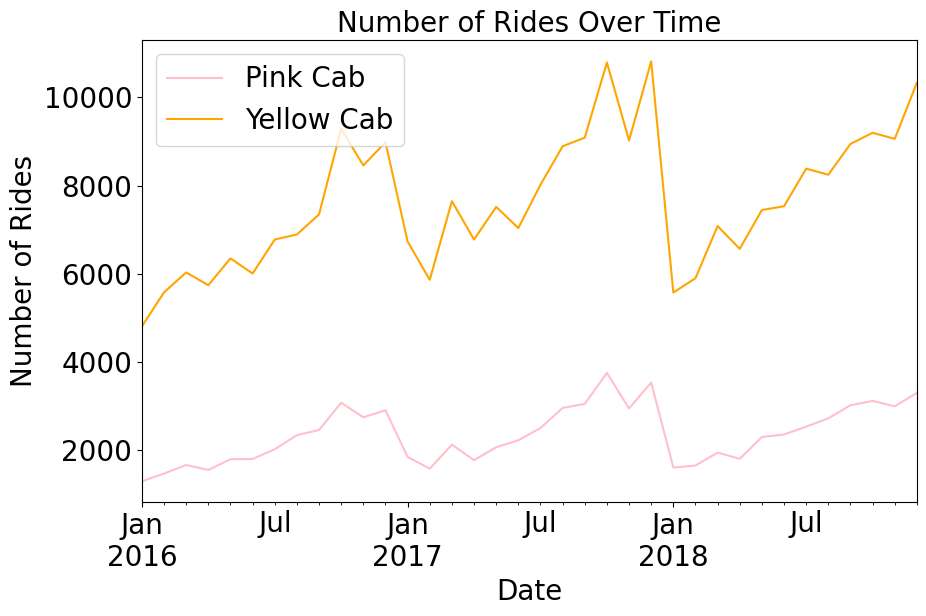

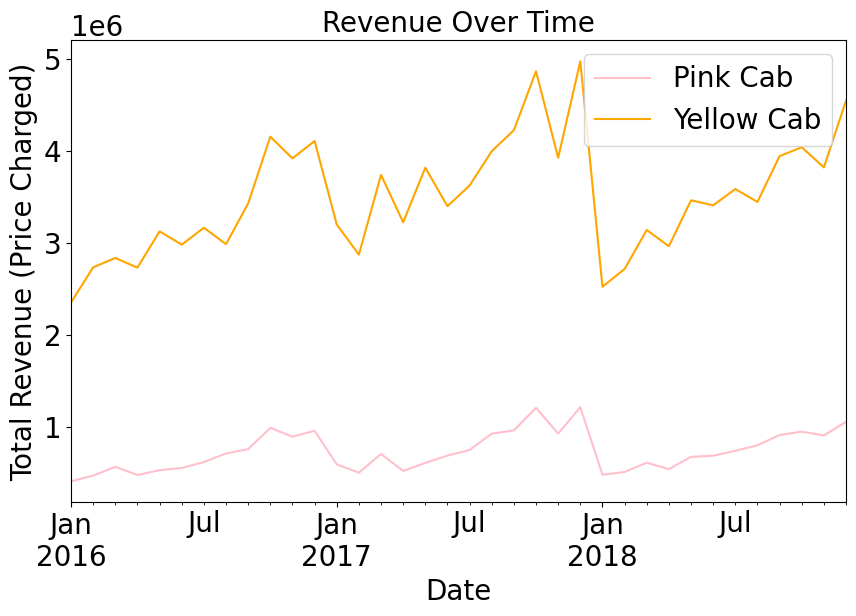

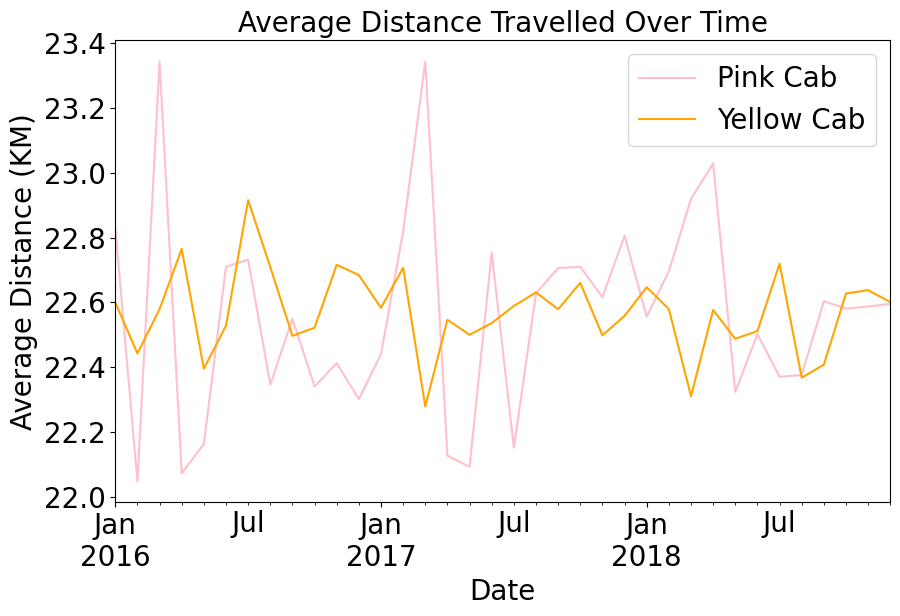

In [13]:
# Ensure that the 'Date of Travel' column is in datetime format
final_data['Date of Travel'] = pd.to_datetime(final_data['Date of Travel'])
# First, we need to extract the month and year from the 'Date of Travel' for time series analysis
final_data['year_month'] = final_data['Date of Travel'].dt.to_period('M')

# 1. Number of Rides Over Time (for each company)
rides_over_time = final_data.groupby(['year_month', 'Company']).size().unstack().fillna(0)

# 2. Revenue Over Time (for each company)
revenue_over_time = final_data.groupby(['year_month', 'Company'])['Price Charged'].sum().unstack().fillna(0)

# 3. Average Distance Travelled Over Time (for each company)
distance_over_time = final_data.groupby(['year_month', 'Company'])['KM Travelled'].mean().unstack().fillna(0)

# Plotting the trends
# Number of Rides Over Time
rides_over_time.plot(figsize=(10, 6), color=['pink', 'orange'])
plt.title('Number of Rides Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.legend(['Pink Cab', 'Yellow Cab'])
plt.show()

# Revenue Over Time
revenue_over_time.plot(figsize=(10, 6), color=['pink', 'orange'])
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue (Price Charged)')
plt.legend(['Pink Cab', 'Yellow Cab'])
plt.show()

# Average Distance Travelled Over Time
distance_over_time.plot(figsize=(10, 6), color=['pink', 'orange'])
plt.title('Average Distance Travelled Over Time')
plt.xlabel('Date')
plt.ylabel('Average Distance (KM)')
plt.legend(['Pink Cab', 'Yellow Cab'])
plt.show()


##### Insights
Here are the time-based trends:

1. Number of Rides Over Time: The number of rides fluctuates over the years, with notable increases and decreases. Both Pink Cab and Yellow Cab exhibit similar trends, but the overall volume is higher for Yellow Cab.

2. Revenue Over Time: Yellow Cab consistently generates more revenue than Pink Cab, which aligns with the fact that Yellow Cab charges higher prices on average.

3. Average Distance Travelled Over Time: The average distance traveled per ride remains relatively consistent for both companies, with no dramatic changes.

#### 2. City Wise Comparison

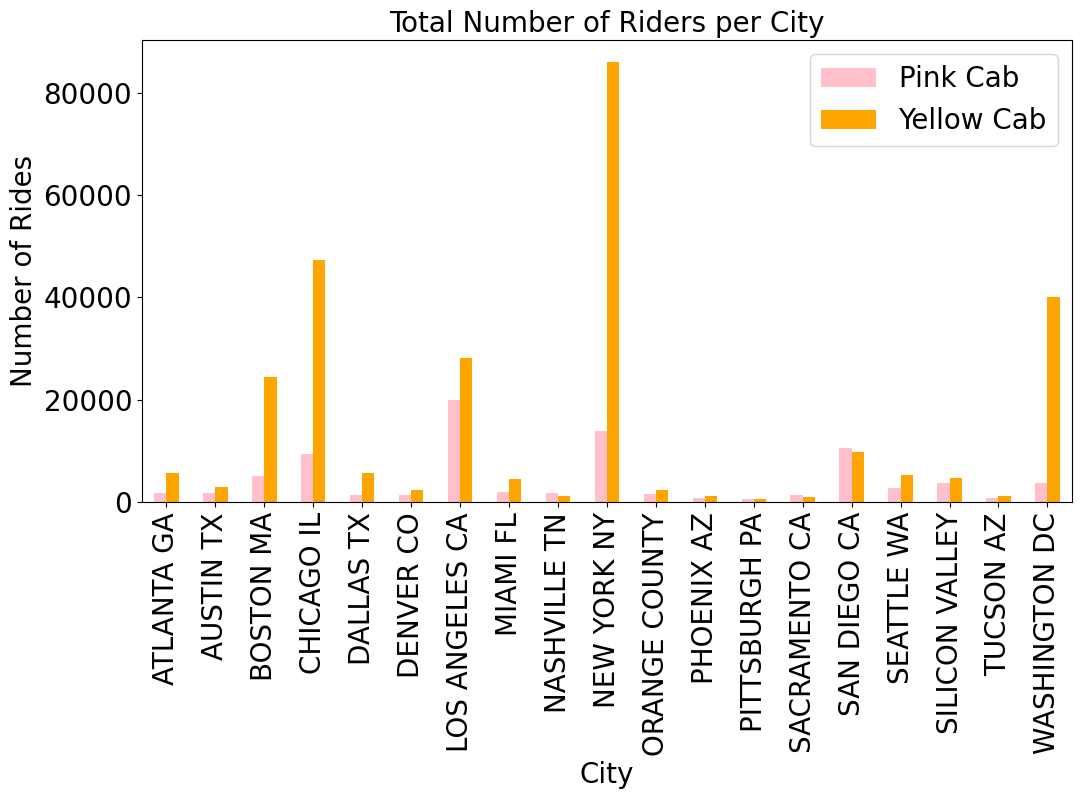

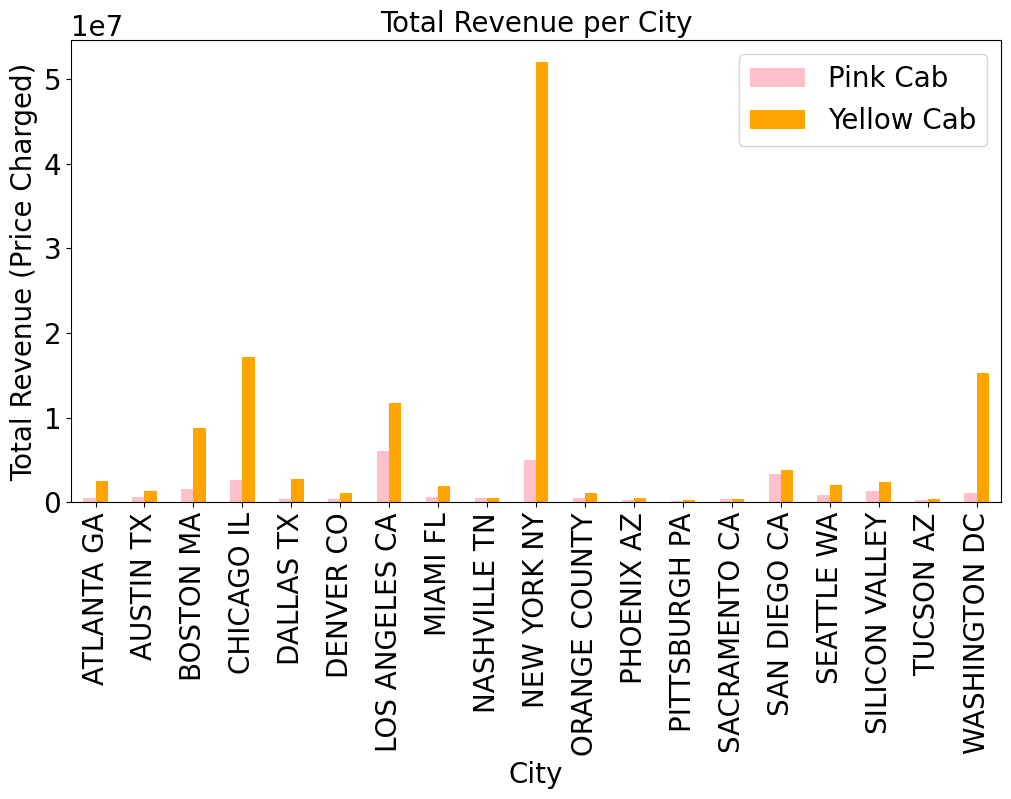

In [14]:
# 1. Total number of rides per city (for both companies)
city_rides = final_data.groupby(['City', 'Company']).size().unstack().fillna(0)

# 2. Revenue by city (for both companies)
city_revenue = final_data.groupby(['City', 'Company'])['Price Charged'].sum().unstack().fillna(0)

# Plotting the results

# 1. Total number of rides per city
city_rides.plot(kind='bar', figsize=(12, 6), color=['pink', 'orange'])
plt.title('Total Number of Riders per City')
plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.legend(['Pink Cab', 'Yellow Cab'])
plt.xticks(rotation=90)
plt.show()

# 2. Revenue by city
city_revenue.plot(kind='bar', figsize=(12, 6), color=['pink', 'orange'])
plt.title('Total Revenue per City')
plt.xlabel('City')
plt.ylabel('Total Revenue (Price Charged)')
plt.legend(['Pink Cab', 'Yellow Cab'])
plt.xticks(rotation=90)
plt.show()


##### Insights
Here are the city-wise comparisons:

1. Total Number of Rides per City: The bar chart shows the total number of rides in each city for both Pink Cab and Yellow Cab. Some cities have a clear preference for one company over the other.

2. Total Revenue per City: This chart compares the revenue generated by each company in various cities, highlighting which cities are more profitable for Pink Cab versus Yellow Cab.

These insights help identify city-specific performance and potential growth areas for each company.

#### 3. Profit for both companies

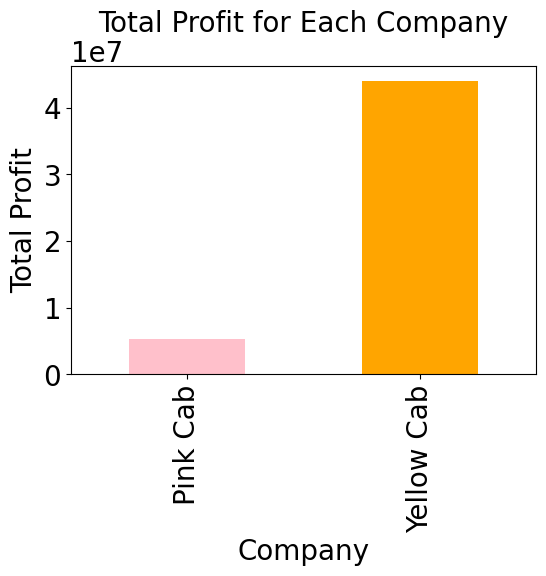

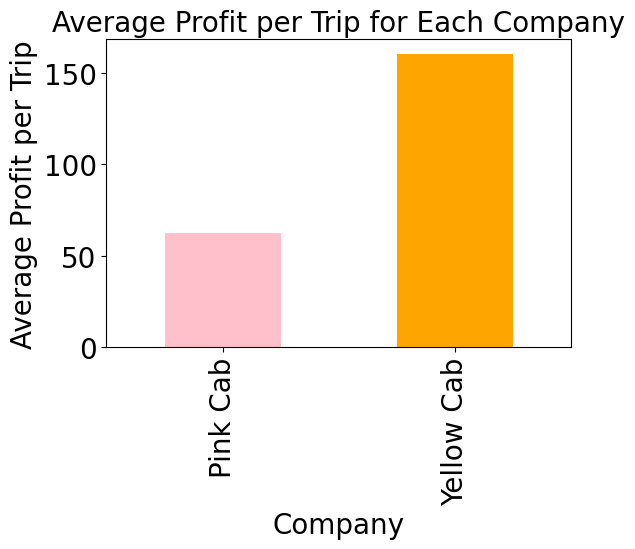

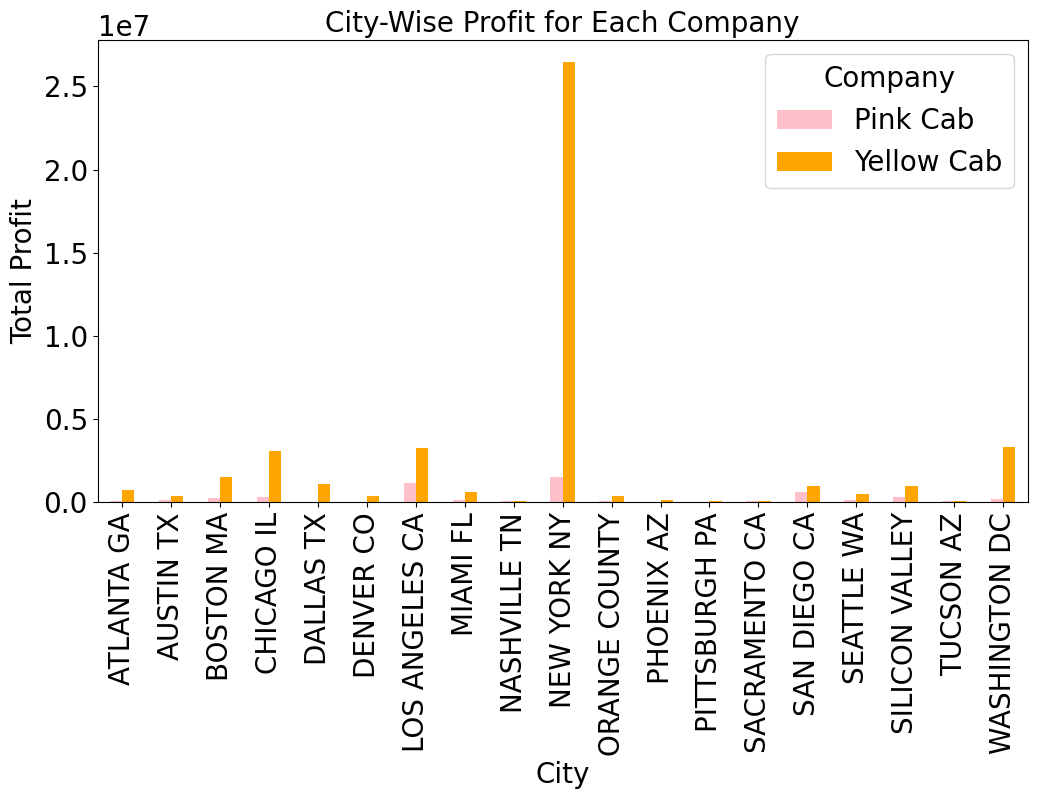

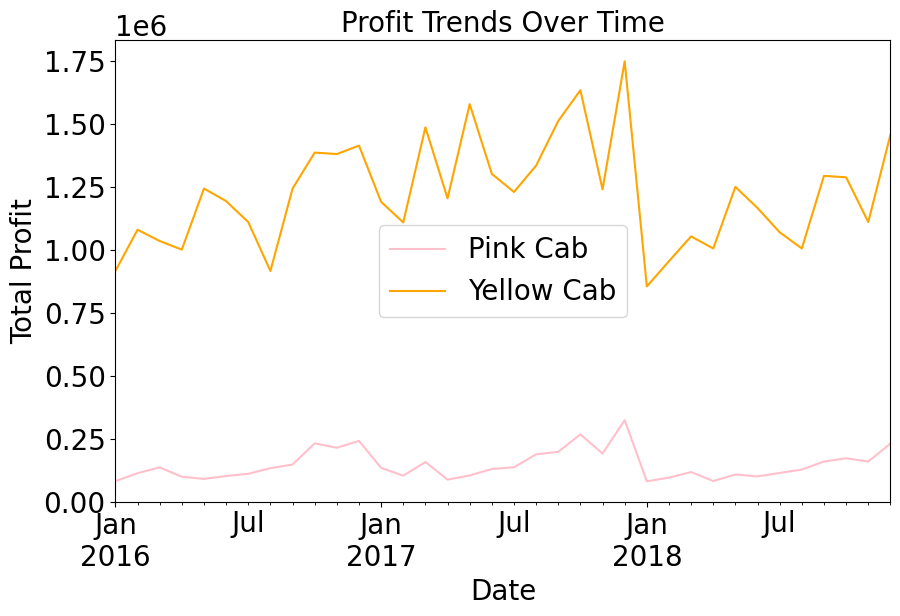

In [15]:
# Calculate profit per trip for each record
final_data['Profit'] = final_data['Price Charged'] - final_data['Cost of Trip']

# 1. Total Profit for each company
total_profit = final_data.groupby('Company')['Profit'].sum()

# 2. Average Profit per Trip for each company
average_profit_per_trip = final_data.groupby('Company')['Profit'].mean()

# 3. City-wise Profit for each company
city_wise_profit = final_data.groupby(['City', 'Company'])['Profit'].sum().unstack().fillna(0)

# 4. Profit Trends Over Time
# Extracting year and month from 'Date of Travel' for time analysis
final_data['year_month'] = final_data['Date of Travel'].dt.to_period('M')
profit_trends_over_time = final_data.groupby(['year_month', 'Company'])['Profit'].sum().unstack().fillna(0)

# Plotting the results

# Total Profit for each company
plt.figure(figsize=(6, 4))
total_profit.plot(kind='bar', color=['pink', 'orange'])
plt.title('Total Profit for Each Company')
plt.ylabel('Total Profit')
plt.show()

# Average Profit per Trip for each company
plt.figure(figsize=(6, 4))
average_profit_per_trip.plot(kind='bar', color=['pink', 'orange'])
plt.title('Average Profit per Trip for Each Company')
plt.ylabel('Average Profit per Trip')
plt.show()

# City-wise Profit for each company
city_wise_profit.plot(kind='bar', figsize=(12, 6), color=['pink', 'orange'])
plt.title('City-Wise Profit for Each Company')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.show()

# Profit Trends Over Time
profit_trends_over_time.plot(figsize=(10, 6), color=['pink', 'orange'])
plt.title('Profit Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.legend(['Pink Cab', 'Yellow Cab'])
plt.show()


#### Insights
The profit analysis is complete, and here are the insights based on the visualizations:

1. Total Profit for Each Company: Yellow Cab generates significantly more total profit compared to Pink Cab, likely due to its higher number of rides and higher average fare per ride.

2. Average Profit per Trip: Yellow Cab also shows a higher average profit per trip, reflecting its ability to charge more per ride compared to Pink Cab, despite its higher operational costs.

3. City-Wise Profit for Each Company: Major cities such as New York and Chicago contribute the most profit for both companies. Yellow Cab dominates in terms of profit in most cities.

4. Profit Trends Over Time: Both companies show fluctuations in profit over time, with noticeable peaks during certain periods. Yellow Cab consistently outperforms Pink Cab in terms of profitability.

#### 4. Repeat Customer Rate

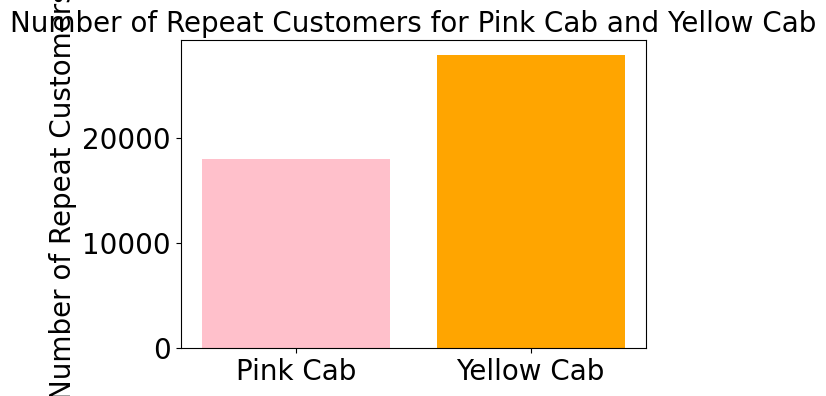

In [16]:
# Count the number of rides per customer for each company
customer_rides = final_data.groupby(['Customer ID', 'Company']).size().unstack().fillna(0)

# Identify repeat customers (those who have more than 1 ride)
repeat_customers_pink = (customer_rides['Pink Cab'] > 1).sum()
repeat_customers_yellow = (customer_rides['Yellow Cab'] > 1).sum()

# Prepare data for visualization
repeat_customers_data = pd.DataFrame({
    'Company': ['Pink Cab', 'Yellow Cab'],
    'Repeat Customers': [repeat_customers_pink, repeat_customers_yellow]
})

# Plot the number of repeat customers for both companies
plt.figure(figsize=(6, 4))
plt.bar(repeat_customers_data['Company'], repeat_customers_data['Repeat Customers'], color=['pink', 'orange'])
plt.title('Number of Repeat Customers for Pink Cab and Yellow Cab')
plt.ylabel('Number of Repeat Customers')
plt.show()


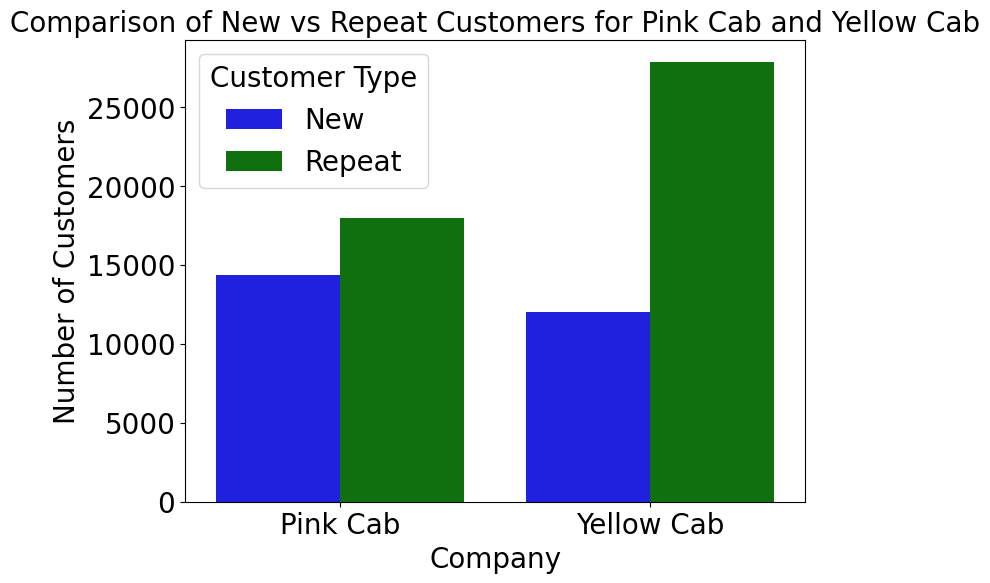

In [17]:
import seaborn as sns

# Identify new and repeat customers for each company
# New customers have only 1 ride, repeat customers have more than 1 ride
new_customers_pink = (customer_rides['Pink Cab'] == 1).sum()
repeat_customers_pink = (customer_rides['Pink Cab'] > 1).sum()

new_customers_yellow = (customer_rides['Yellow Cab'] == 1).sum()
repeat_customers_yellow = (customer_rides['Yellow Cab'] > 1).sum()

# Prepare data for visualization
new_vs_repeat_data = pd.DataFrame({
    'Company': ['Pink Cab', 'Pink Cab', 'Yellow Cab', 'Yellow Cab'],
    'Customer Type': ['New', 'Repeat', 'New', 'Repeat'],
    'Count': [new_customers_pink, repeat_customers_pink, new_customers_yellow, repeat_customers_yellow]
})
# Plot the comparison of new vs repeat customers for both companies
plt.figure(figsize=(8, 6))
sns.barplot(x='Company', y='Count', hue='Customer Type', data=new_vs_repeat_data, palette=['blue', 'green'])
plt.title('Comparison of New vs Repeat Customers for Pink Cab and Yellow Cab')
plt.ylabel('Number of Customers')
plt.show()

##### Insights

The bar chart above compares the number of repeat customers for Pink Cab and Yellow Cab. It shows the count of customers who have taken more than one ride with each company.

1. Customer Retention:
* Yellow Cab has a higher number of repeat customers compared to Pink Cab, indicating that Yellow Cab is better at retaining customers. This suggests that Yellow Cab may offer a more appealing or convenient service that encourages customers to return.

* Pink Cab, while still retaining some repeat customers, shows a lower proportion of repeat users compared to Yellow Cab, which may indicate opportunities to improve customer loyalty or engagement.

2. New Customer Acquisition:
Both companies have a significant number of new customers, suggesting that they are continuing to acquire fresh users.

* Pink Cab has a relatively higher proportion of new customers compared to repeat customers. This could indicate that Pink Cab is attracting first-time users but may need to enhance its services or customer experience to convert them into loyal, repeat users.

# Forecasting next years' profit

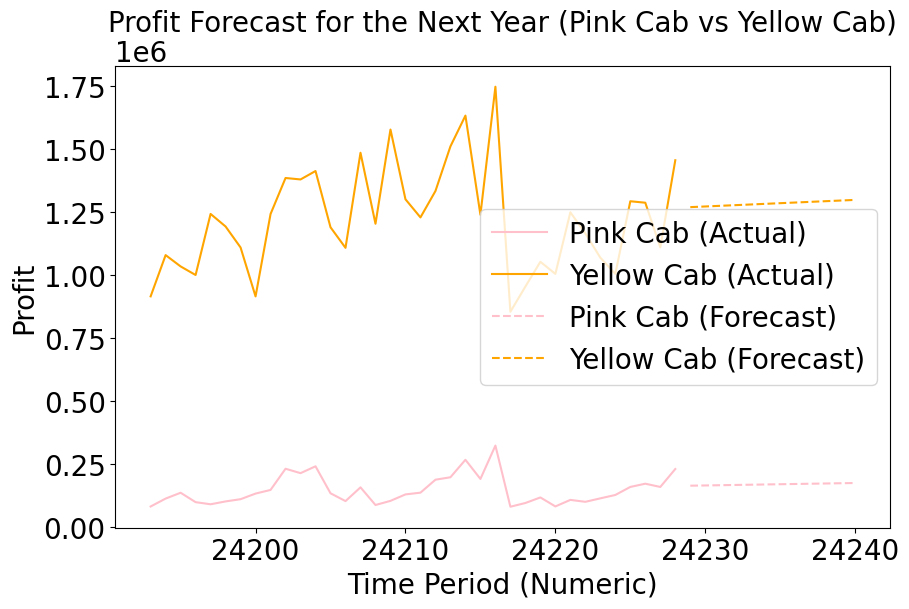

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
# Fixing the issue with future date generation for forecasting
# Since we converted year_month to a numeric format for regression, I'll generate numeric future months instead
# Prepare the data: use the profit trends over time as input for regression
# We need to reset the index to make 'year_month' numeric for the regression model
profit_trends_over_time = profit_trends_over_time.reset_index()

# Convert 'year_month' to a numeric format (we can use integer representation of months for simplicity)
profit_trends_over_time['year_month'] = profit_trends_over_time['year_month'].apply(lambda x: x.year * 12 + x.month)

# Separate data for Pink Cab and Yellow Cab
X = profit_trends_over_time[['year_month']]  # Time period (independent variable)
y_pink = profit_trends_over_time['Pink Cab']  # Profit for Pink Cab (dependent variable)
y_yellow = profit_trends_over_time['Yellow Cab']  # Profit for Yellow Cab (dependent variable)

# Fit Linear Regression Models for both Pink Cab and Yellow Cab
model_pink = LinearRegression().fit(X, y_pink)
model_yellow = LinearRegression().fit(X, y_yellow)


# Generate numeric future months for forecasting
future_months_numeric = np.arange(X['year_month'].max() + 1, X['year_month'].max() + 13).reshape(-1, 1)

# Forecast the next 12 months using the linear regression models
forecast_pink = model_pink.predict(future_months_numeric)
forecast_yellow = model_yellow.predict(future_months_numeric)

# Combine actual and forecasted data for plotting
forecast_dates = np.arange(X['year_month'].max() + 1, X['year_month'].max() + 13)

# Plot the forecasted profits along with actual profits
plt.figure(figsize=(10, 6))

# Plot actual profits
plt.plot(X['year_month'], y_pink, label='Pink Cab (Actual)', color='pink')
plt.plot(X['year_month'], y_yellow, label='Yellow Cab (Actual)', color='orange')

# Plot forecasted profits
plt.plot(forecast_dates, forecast_pink, '--', label='Pink Cab (Forecast)', color='pink')
plt.plot(forecast_dates, forecast_yellow, '--', label='Yellow Cab (Forecast)', color='orange')

plt.title('Profit Forecast for the Next Year (Pink Cab vs Yellow Cab)')
plt.xlabel('Time Period (Numeric)')
plt.ylabel('Profit')
plt.legend()
plt.show()


#### Insights
The linear regression model has successfully forecasted the profits for both Pink Cab and Yellow Cab for the next 12 months. Here's what the plot shows:

1. Actual Profits: The solid lines represent the actual profits for Pink Cab (in pink) and Yellow Cab (in yellow).
2. Forecasted Profits: The dashed lines show the predicted profits for both companies over the next year.

Based on the trend, Yellow Cab is expected to continue generating higher profits compared to Pink Cab, although both companies are projected to see positive profit growth.



# Investment Recommendation for XYZ
## Recommendation: Invest in Yellow Cab

Based on the data and analysis, I recommended that XYZ invest in Yellow Cab for the following reasons:

**Higher Profitability:** Yellow Cab generates more revenue per trip and is expected to continue growing profitably over the next year.

**Customer Loyalty:** Yellow Cab retains a higher percentage of repeat customers, ensuring a stable revenue base.

**Market Leadership:** Yellow Cab dominates in key cities and shows strong growth potential, particularly in larger urban areas.

**Positive Forecast:** The profit forecast indicates continued growth and profitability for Yellow Cab.

## Improvements for Pink Cab:

While Yellow Cab is the better investment choice, Pink Cab can improve its position by:

**Implementing Loyalty Programs:** To increase customer retention and convert more new users into repeat customers.

**Optimizing Pricing Strategies:** Introducing dynamic pricing during peak hours could help Pink Cab increase its revenue per trip.

**Expanding into High-Growth Cities:** Targeting smaller, high-potential cities like Miami could help Pink Cab compete more effectively.

---


# Future Work and Expansion

To refine and expand the analysis, we can integrate third-party data such as:

* US Holiday Data: Analyzing cab usage spikes around holidays could help optimize fleet availability and pricing strategies.

* Weather Data: Examining how weather conditions impact cab demand can further improve operational planning.

* Traffic Data: Incorporating traffic data could help optimize routes and reduce trip durations.

---


# Conclusion

This comprehensive analysis provided data-driven insights that guided XYZ's investment decision. Yellow Cab emerged as the clear leader due to its higher profitability, customer retention, and market dominance. However, Pink Cab shows potential in niche markets and can improve its standing by focusing on customer loyalty and pricing strategies.